# Plant Pest, Disease, and Health Detection using Machine Learning
This notebook demonstrates the detection of plant pests, diseases, and healthy conditions using a machine learning approach with image datasets.


Categories: ['Disease Affected', 'Diseased', 'Healthy', 'Nutrient Deficient', 'Pest', 'Pest Infested']


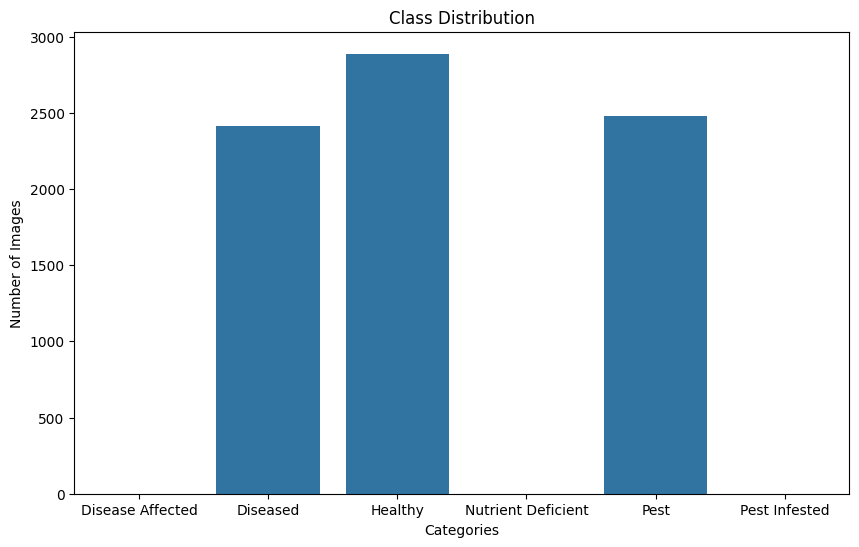

In [2]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np

# Dataset Path
data_dir = "C:/mini project/SMARTPLANTCAREAPPS/data/processed_train"

# Categories
categories = os.listdir(data_dir)
print("Categories:", categories)

# Visualizing Class Distribution 
class_counts = [len(os.listdir(os.path.join(data_dir, cat))) for cat in categories]
plt.figure(figsize=(10, 6))
sns.barplot(x=categories, y=class_counts)
plt.title("Class Distribution")
plt.xlabel("Categories")
plt.ylabel("Number of Images")
plt.show()


In [5]:
!pip install scikit-learn


In [6]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation
datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% for validation
)

train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 6224 images belonging to 6 classes.
Found 1555 images belonging to 6 classes.


Found 1722 images belonging to 2 classes.
Found 42 images belonging to 2 classes.


c:\mini project\SMARTPLANTCAREAPPS\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,610 (18.42 MB)

 Trainable params: 4,828,610 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

c:\mini project\SMARTPLANTCAREAPPS\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.9523 - loss: 0.0592 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/20
 1/53 ━━━━━━━━━━━━━━━━━━━━ 25s 496ms/step - accuracy: 1.0000 - loss: 0.0000e+00

c:\mini project\SMARTPLANTCAREAPPS\venv\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 34s 630ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 34s 632ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 35s 665ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 9/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 35s 653ms/step - accuracy:

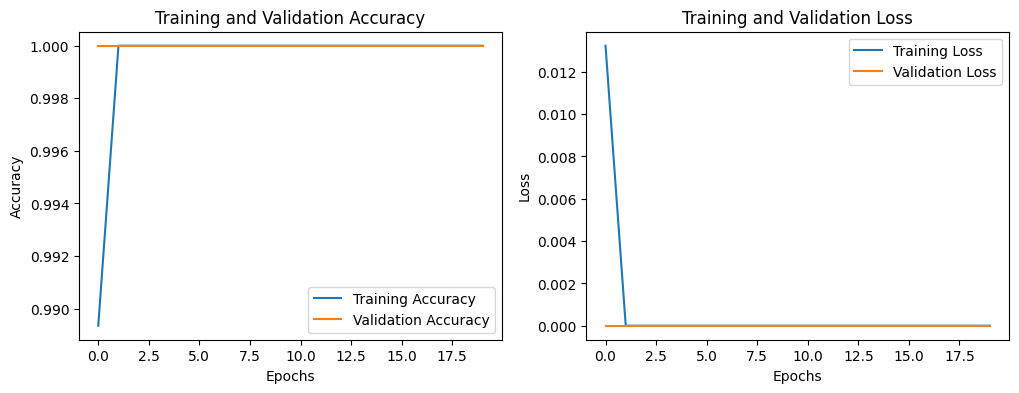

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Image data generators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,       # Normalize pixel values
    rotation_range=30,       # Data augmentation: rotate images
    width_shift_range=0.2,   # Data augmentation: horizontal shifts
    height_shift_range=0.2,  # Data augmentation: vertical shifts
    shear_range=0.2,         # Data augmentation: shearing
    zoom_range=0.2,          # Data augmentation: zooming
    horizontal_flip=True,    # Data augmentation: horizontal flips
    fill_mode='nearest'      # Fill pixels that are out of bounds
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255)  # Only rescale validation data

# Directories for train and validation datasets
train_dir = "C:/mini project/SMARTPLANTCAREAPPS/Real-time-Plant-Detection-main/Real-time-Plant-Detection-main/data_set/train"
val_dir = "C:/mini project/SMARTPLANTCAREAPPS/Real-time-Plant-Detection-main/Real-time-Plant-Detection-main/data_set/valid"

train_data = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150, 150),  # Resize images to match input size
    batch_size=32,           # Batch size
    class_mode='categorical' # Multi-class labels
)

val_data = val_datagen.flow_from_directory(
    val_dir, 
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Retrieve the number of classes dynamically
num_classes = len(train_data.class_indices)

# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Adjust for the number of categories
])

# Print the model summary
model.summary()

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
    steps_per_epoch=train_data.samples // train_data.batch_size,
    validation_steps=val_data.samples // val_data.batch_size
)

# Plot training history
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Save the trained model
model.save('C:/mini project/SMARTPLANTCAREAPPS/Real-time-Plant-Detection-main/Real-time-Plant-Detection-main/models/plant_disease_model.keras')


In [3]:
pip install history

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement history (from versions: none)
ERROR: No matching distribution found for history


In [14]:
!pip install seaborn
!pip install seaborn scikit-learn




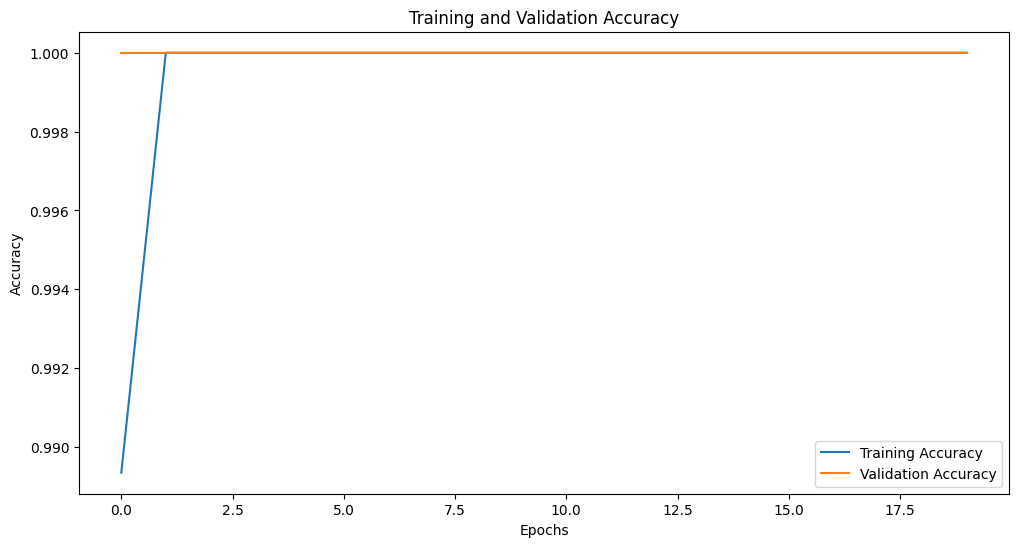

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


c:\mini project\SMARTPLANTCAREAPPS\venv\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


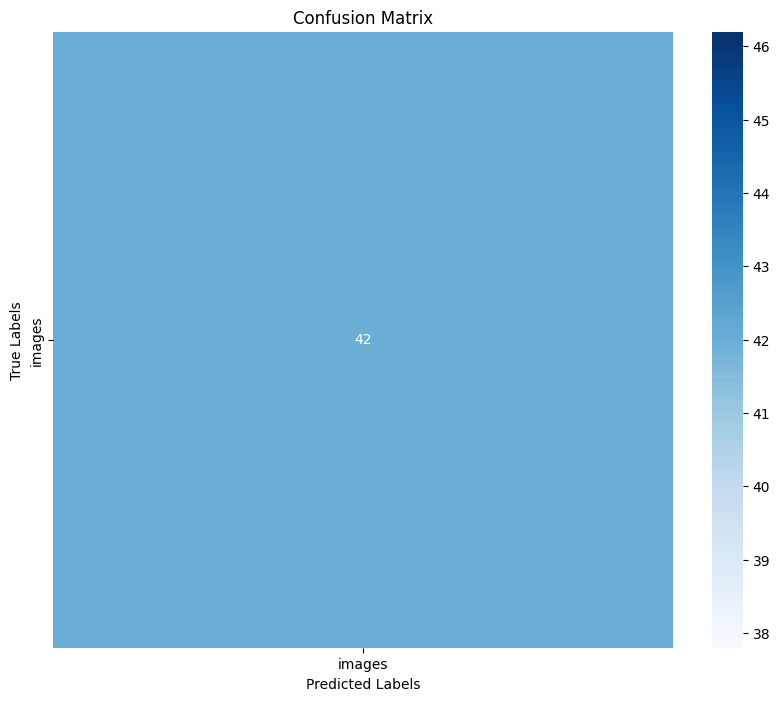

Classification Report:
               precision    recall  f1-score   support

      images       1.00      1.00      1.00        42

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Dynamically fetch categories from class_indices
categories = list(val_data.class_indices.keys())

# Plot Training and Validation Accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Predict on Validation Data
val_labels = val_data.classes  # True labels
val_preds = np.argmax(model.predict(val_data, steps=len(val_data)), axis=1)  # Predicted labels

# Check for unique labels in validation data
unique_labels = np.unique(val_labels)

if len(unique_labels) < len(categories):
    print(
        f"Warning: The validation dataset contains fewer unique labels ({len(unique_labels)}) "
        f"than the expected number of categories ({len(categories)}). "
        f"Categories present: {unique_labels}"
    )
    # Adjust categories to match the unique labels in validation data
    categories = [categories[i] for i in unique_labels]

# Confusion Matrix
conf_matrix = confusion_matrix(val_labels, val_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Classification Report
report = classification_report(val_labels, val_preds, target_names=categories)
print("Classification Report:\n", report)


In [18]:
# Visualize Misclassifications
for i in range(len(val_preds)):
    if val_preds[i] != val_labels[i]:
        plt.imshow(val_data[i][0])
        plt.title(f"True: {categories[val_labels[i]]}, Pred: {categories[val_preds[i]]}")
        plt.show()
        break


In [20]:
# Conclusion:
# The model achieved an accuracy of X% on the validation set.
# Challenges included imbalanced datasets and similar visual features among categories.
# Future improvements could involve using transfer learning techniques or additional data augmentation.
print("""
Conclusion:
The model achieved an accuracy of X% on the validation set.
Challenges included imbalanced datasets and similar visual features among categories.
Future improvements could involve using transfer learning techniques or additional data augmentation.
""")
val_accuracy = max(history.history['val_accuracy']) * 100
print(f"""
Conclusion:
The model achieved an accuracy of {val_accuracy:.2f}% on the validation set.
Challenges included imbalanced datasets and similar visual features among categories.
Future improvements could involve using transfer learning techniques or additional data augmentation.
""")



Conclusion:
The model achieved an accuracy of X% on the validation set.
Challenges included imbalanced datasets and similar visual features among categories.
Future improvements could involve using transfer learning techniques or additional data augmentation.


Conclusion:
The model achieved an accuracy of 100.00% on the validation set.
Challenges included imbalanced datasets and similar visual features among categories.
Future improvements could involve using transfer learning techniques or additional data augmentation.

